<a href="https://colab.research.google.com/github/nbchan/INMR96-Digital-Health-and-Data-Analytics/blob/main/Week_03_Tabular_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Pandas and Why Pandas?

* the go-to Python package/library for column-oriented data analysis
* great tool for handling and analyzing tabular data
* many machine learning frameworks support pandas data structures as inputs


For a complete reference to pandas functions, the [*Pandas* documentation](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive info and many tutorials.

---

# Basic Concepts

Similar to how you would import packages in [R](https://www.r-project.org/about.html) using `library()`, the following line **imports** the *pandas* library to your current notebook. This line is usually put in the beginning of your code.

Note that the `as` keyword is used to create an alias for the package.

In [1]:
import pandas as pd

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**: A relational data table with rows and named columns.
  * **`Series`**: A single column that stores a set of data. A `DataFrame` contains one or more `Series`; and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation, similar to R.

![pandas-data-structure](https://raw.githubusercontent.com/niuguy/digithealthcourse/master/pics/pandas-data-structure.png)


One way to create a `Series` is to construct a `Series` object. For example:

In [4]:
pd.Series(['Alex', 'Branda', 'Cindy'])

0      Alex
1    Branda
2     Cindy
dtype: object

`DataFrame` objects can be created by passing a Python dictionary that maps column names to their respective `Series`. For example:

In [34]:
customer = pd.Series(['Alex', 'Branda', 'Cindy'])
spendings = pd.Series([100, 300, 250])
country = pd.Series(['UK', 'France', 'Ireland'])

df_customer = pd.DataFrame({'name': customer, 'spendings': spendings, 'country': country})

In [35]:
df_customer

,name,spendings,country
0,Alex,100,UK
1,Branda,300,France
2,Cindy,250,Ireland


To retrieve a column (as a `Series`) from a `DataFrame`, use square brackets:

In [7]:
df_customer['spendings']

0    100
1    300
2    250
Name: spendings, dtype: int64

To retrieve multiple columns, put a list of column names within the square brackets instead of a string:

In [37]:
df_customer[['name', 'country']]

,name,country
0,Alex,UK
1,Branda,France
2,Cindy,Ireland


---

# Importing MIMIC-III data from BigQuery as a Pandas `DataFrame` 

Most of the time, instead of creating `DataFrame`'s from scratch in Python, you load an entire file as a DataFrame. In our case, we would import MIMIC-III data via BigQuery. There are a few steps to do so.

## 1. Provide your credentials to the Colab runtime

Run the following code. You will be given a link that requests permission of the notebook to access your data from BigQuery. Enter that link and accept the request. You might be asked to enter your password in this step. 

After that, you will be given a one-time authentication token. Copy and paste it to the textbox under the link. If successful, the message "Authenticated" would be printed. 



In [6]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


**Troubleshooting**

If you are unable to authenticate yourself, check for the following: 

* Make sure you have followed the [guide to access MIMIC-III on BigQuery](https://mimic.mit.edu/docs/gettingstarted/cloud/bigquery/).
* Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one. 
  * Almost all of your interactions with Google Cloud Platform (GCP) are associated with a project. Importantly, all billing for your usage must be allotted to a single project. In order to use BigQuery you must have an activate project associated with your account. BigQuery offers a $300 free trial for first time users. You should not be billed for any reasonable usage for completing the module.
* [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.

## 2. Execute your SQL queries and save the results as a `DataFrame`




The best way to do so is to use *cell magic* built in by the `google.cloud.bigquery` library. See the code below but **make two changes** before running the code for yourself. 

* Replace `your-project-id-here` with your GCP project ID found in [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager). 
* Replace the SQL query with a query of your choice. As a best practice, you should write and test the SQL queries in [BigQuery](https://console.cloud.google.com/bigquery) first, then paste it in Colab.

In [7]:
%%bigquery --project your-project-id-here

SELECT * FROM `physionet-data.mimiciii_clinical.admissions`

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,8902,7275,136809,2139-08-28 12:35:00,2139-09-01 16:32:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,EPISCOPALIAN,DIVORCED,WHITE,2139-08-28 10:38:00,2139-08-28 14:30:00,ALTERED MENTAL STATUS; DYSPNEA,0,1
1,21467,17575,187131,2124-10-21 08:32:00,2124-11-01 11:14:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Government,None,OTHER,SINGLE,BLACK/AFRICAN AMERICAN,2124-10-21 05:04:00,2124-10-21 09:52:00,MVA;TRAUMA,0,1
2,30863,25251,142346,2167-01-23 16:23:00,2167-02-06 13:53:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,None,EPISCOPALIAN,DIVORCED,WHITE,2167-01-23 12:54:00,2167-01-23 18:00:00,INFECTED RIGHT FOOT,0,1
3,39212,32339,181355,2110-07-29 23:56:00,2110-08-04 15:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,MARRIED,WHITE,2110-07-29 20:17:00,2110-07-30 01:24:00,GASTROINTESTINAL BLEED;CHEST PAIN;TELEMETRY,0,1
4,37441,30746,155603,2131-08-22 23:07:00,2131-08-28 13:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,DIVORCED,WHITE,2131-08-22 14:15:00,2131-08-23 01:20:00,ALTERED MENTAL STATUS,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,38142,31355,146717,2110-07-28 22:03:00,2110-07-30 19:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Private,PTUN,UNOBTAINABLE,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,NECROTIZING PANCREATITIS,0,1
58972,45558,58016,105567,2118-10-08 20:59:00,2118-10-11 09:02:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Medicaid,PTUN,BUDDHIST,DIVORCED,UNABLE TO OBTAIN,NaT,NaT,GALLSTONES,0,1
58973,47608,64255,145415,2151-11-05 22:32:00,2151-11-07 13:10:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Private,PTUN,NOT SPECIFIED,MARRIED,WHITE,NaT,NaT,STATUS EPILEPTICUS,0,1
58974,53619,83060,122843,2158-10-11 19:08:00,2158-10-15 12:11:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Medicare,ENGL,NOT SPECIFIED,DIVORCED,UNKNOWN/NOT SPECIFIED,NaT,NaT,RIGHTBRONCHUS MASS,0,1


Instead of simply printing the query results, you can save it in a Python variable by specifying a variable name after your GCP project ID. The following line saves the `admissions` table to the variable `df`. 

If you need to execute multiple SQL queries through BigQuery, make sure to save it as different variables by editing the variable name `df`. 

In [8]:
%%bigquery --project your-project-id-here df

SELECT * FROM `physionet-data.mimiciii_clinical.admissions`

In [9]:
df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,8902,7275,136809,2139-08-28 12:35:00,2139-09-01 16:32:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,EPISCOPALIAN,DIVORCED,WHITE,2139-08-28 10:38:00,2139-08-28 14:30:00,ALTERED MENTAL STATUS; DYSPNEA,0,1
1,21467,17575,187131,2124-10-21 08:32:00,2124-11-01 11:14:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Government,None,OTHER,SINGLE,BLACK/AFRICAN AMERICAN,2124-10-21 05:04:00,2124-10-21 09:52:00,MVA;TRAUMA,0,1
2,30863,25251,142346,2167-01-23 16:23:00,2167-02-06 13:53:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,None,EPISCOPALIAN,DIVORCED,WHITE,2167-01-23 12:54:00,2167-01-23 18:00:00,INFECTED RIGHT FOOT,0,1
3,39212,32339,181355,2110-07-29 23:56:00,2110-08-04 15:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,MARRIED,WHITE,2110-07-29 20:17:00,2110-07-30 01:24:00,GASTROINTESTINAL BLEED;CHEST PAIN;TELEMETRY,0,1
4,37441,30746,155603,2131-08-22 23:07:00,2131-08-28 13:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,DIVORCED,WHITE,2131-08-22 14:15:00,2131-08-23 01:20:00,ALTERED MENTAL STATUS,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,38142,31355,146717,2110-07-28 22:03:00,2110-07-30 19:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Private,PTUN,UNOBTAINABLE,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,NECROTIZING PANCREATITIS,0,1
58972,45558,58016,105567,2118-10-08 20:59:00,2118-10-11 09:02:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Medicaid,PTUN,BUDDHIST,DIVORCED,UNABLE TO OBTAIN,NaT,NaT,GALLSTONES,0,1
58973,47608,64255,145415,2151-11-05 22:32:00,2151-11-07 13:10:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Private,PTUN,NOT SPECIFIED,MARRIED,WHITE,NaT,NaT,STATUS EPILEPTICUS,0,1
58974,53619,83060,122843,2158-10-11 19:08:00,2158-10-15 12:11:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LEFT AGAINST MEDICAL ADVI,Medicare,ENGL,NOT SPECIFIED,DIVORCED,UNKNOWN/NOT SPECIFIED,NaT,NaT,RIGHTBRONCHUS MASS,0,1


For some advanced usage such as to incorporate a Python variable in SQL queries, check out the example [here](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=fkhbyGaXKs_6).

---

# Basic Pandas functions

| Name | Description  |
|---|---|
| `DataFrame.columns` | shows a list of column names of a `DataFrame` |
| `DataFrame.describe()` | shows summary statistics about a `DataFrame` for all numerical columns |
| `DataFrame.head()` | displays the first few records of a `DataFrame` |
| `Series.unique()` | shows a list of unique values of a (categorical) column |
| `Series.value_counts()` | counts and tallies the occurrence of each value in a (categorical) column |
| `Series.hist()` | shows the distribution of values in a numerical column |

When in doubt, it is usually useful to refer to [Panda's Documentations](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html). 

In [17]:
df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [19]:
df.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,8902,7275,136809,2139-08-28 12:35:00,2139-09-01 16:32:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,EPISCOPALIAN,DIVORCED,WHITE,2139-08-28 10:38:00,2139-08-28 14:30:00,ALTERED MENTAL STATUS; DYSPNEA,0,1
1,21467,17575,187131,2124-10-21 08:32:00,2124-11-01 11:14:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Government,None,OTHER,SINGLE,BLACK/AFRICAN AMERICAN,2124-10-21 05:04:00,2124-10-21 09:52:00,MVA;TRAUMA,0,1
2,30863,25251,142346,2167-01-23 16:23:00,2167-02-06 13:53:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,None,EPISCOPALIAN,DIVORCED,WHITE,2167-01-23 12:54:00,2167-01-23 18:00:00,INFECTED RIGHT FOOT,0,1
3,39212,32339,181355,2110-07-29 23:56:00,2110-08-04 15:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,MARRIED,WHITE,2110-07-29 20:17:00,2110-07-30 01:24:00,GASTROINTESTINAL BLEED;CHEST PAIN;TELEMETRY,0,1
4,37441,30746,155603,2131-08-22 23:07:00,2131-08-28 13:10:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,ICF,Medicare,ENGL,JEWISH,DIVORCED,WHITE,2131-08-22 14:15:00,2131-08-23 01:20:00,ALTERED MENTAL STATUS,0,1


In [20]:
df['ADMISSION_TYPE'].unique()

array(['EMERGENCY', 'ELECTIVE', 'URGENT', 'NEWBORN'], dtype=object)

In [21]:
df['ADMISSION_TYPE'].value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [18]:
df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,29488.500000,33755.583288,149970.809584,0.099261,0.973006
std,17025.049075,28092.726225,28883.095213,0.299014,0.162067
min,1.000000,2.000000,100001.000000,0.000000,0.000000
25%,14744.750000,11993.750000,124952.750000,0.000000,1.000000
50%,29488.500000,24133.500000,149989.500000,0.000000,1.000000
75%,44232.250000,53851.500000,174966.500000,0.000000,1.000000
max,58976.000000,99999.000000,199999.000000,1.000000,1.000000


All variables are either identifiers or categorical variables in the above example.

To showcase the functions for numerical data, let us download a [COVID-19 worldwide dataset](https://github.com/owid/covid-19-data/blob/master/public/data/) with the following code. 

In [3]:
df_covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [4]:
df_covid # the results could be different as the data source is constantly being updated

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157018,ZWE,Africa,Zimbabwe,2022-01-20,227552.0,665.0,352.571,5276.0,10.0,7.714,15077.486,44.063,23.361,349.585,0.663,0.511,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,1816276.0,120.346,0.293,4675.0,0.31,0.0754,13.3,tests performed,7483232.0,4228652.0,3254580.0,NaN,10679.0,10562.0,49.58,28.02,21.56,NaN,700.0,5087.0,0.034,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157019,ZWE,Africa,Zimbabwe,2022-01-21,227961.0,409.0,332.000,5288.0,12.0,7.143,15104.586,27.100,21.998,350.380,0.795,0.473,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7496882.0,4234640.0,3262242.0,NaN,13650.0,10405.0,49.67,28.06,21.62,NaN,689.0,5

For this tutorial, let's filter the dataset and focus on the data of each country on Jan 1, 2021. 

In [57]:
df_covid_filtered = df_covid[df_covid['date'] == '2022-01-01'] # filter by date
df_covid_filtered = df_covid_filtered[~df_covid_filtered['iso_code'].str.startswith('OWID_')] # removes non-country locations such as "Worldwide", "Asia" and "Low income"

df_covid_filtered

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
677,AFG,Asia,Afghanistan,2022-01-01,158107.0,23.0,30.286,7356.0,0.0,1.000,3969.005,0.577,0.760,184.660,0.000,0.025,1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16935.0,NaN,NaN,NaN,NaN,425.0,15923.0,0.040,19.44,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
2089,ALB,Europe,Albania,2022-01-01,210224.0,0.0,383.143,3217.0,0.0,4.000,73173.975,0.000,133.363,1119.761,0.000,1.392,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3068.0,1426434.0,496.508,1.068,3812.0,1.327,0.1005,9.9,tests performed,NaN,NaN,NaN,NaN,NaN,5843.0,NaN,NaN,NaN,NaN,2034.0,2007.0,0.070,46.30,2872934.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
2789,DZA,Africa,Algeria,2022-01-01,218818.0,386.0,348.857,6284.0,8.0,7.857,4904.405,8.651,7.819,140.844,0.179,0.176,1.21,27.0,0.605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22589.0,NaN,NaN,NaN,NaN,506.0,9845.0,0.022,44.44,44616626.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
3483,AND,Europe,Andorra,2022-01-01,23740.0,0.0,287.143,140.0,0.0,0.143,306900.742,0.000,3712.062,1809.861,0.000,1.847,1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1145.0,14.802,0.2508,4.0,people tested,NaN,NaN,NaN,NaN,NaN,758.0,NaN,NaN,NaN,NaN,9799.0,27.0,0.035,59.26,77354.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
4159,AGO,Africa,Angola,2022-01-01,82398.0,805.0,1608.000,1772.0,2.0,3.714,2428.212,23.723,47.387,52.220,0.059,0.109,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53366.0,NaN,NaN,NaN,NaN,1573.0,31539.0,0.093,66.67,33933611.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153793,VNM,Asia,Vietnam,2022-01-01,1746092.0,14835.0,15662.429,32610.0,216.0,229.000,17786.623,151.117,159.546,332.183,2.200,2.333,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92782.0,0.945,0.1688,5.9,samples tested,NaN,NaN,NaN,NaN,NaN,1016358.0,NaN,NaN,NaN,NaN,10353.0,91649.0,0.093,68.52,98168829.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704,NaN,NaN,NaN,NaN
154256,WLF,Oceania,Wallis and Futu

In [10]:
# (optional) use the seaborn package for better and easier plots
import seaborn as sns
sns.set()

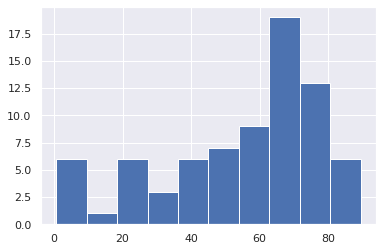

In [58]:
df_covid_filtered['people_fully_vaccinated_per_hundred'].hist()

In [59]:
df_covid_filtered.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.140000e+02,214.000000,214.000000,201.000000,201.000000,201.000000,214.000000,214.000000,214.000000,201.000000,201.000000,201.000000,183.000000,33.000000,33.000000,33.000000,33.000000,7.000000,7.000000,14.000000,14.000000,8.200000e+01,8.100000e+01,81.000000,82.000000,1.190000e+02,119.000000,113.000000,113.000000,8.100000e+01,7.100000e+01,7.600000e+01,5.900000e+01,6.900000e+01,1.960000e+02,81.000000,71.000000,76.000000,59.00000,196.000000,1.920000e+02,192.000000,174.000000,2.180000e+02,204.000000,189.000000,187.00000,188.000000,191.000000,123.000000,188.000000,199.000000,146.000000,144.000000,94.000000,170.000000,216.000000,188.000000,0.0,0.0,0.0,0.0
mean,1.351796e+06,5391.308411,6486.900509,27064.691542,20.925373,30.817373,66127.836621,385.407864,415.770238,998.109687,1.265363,1.504184,1.335792,1136.424242,27.104606,6283.484848,202.960667,834.000000,17.737143,12117.357143,144.107929,1.071193e+05,4.491612e+07,1982.918926,4.840341,1.041751e+05,5.833319,0.143517,127.721239,9.444305e+07,3.311532e+07,2.488047e+07,6.329768e+06,2.069893e+05,1.729485e+05,130.921728,61.724789,54.945789,22.16661,3086.020408,3.404373e+04,0.066630,44.739598,3.594980e+07,455.250289,30.318519,8.63015,5.446511,19255.257403,14.073171,263.478271,8.392111,10.819863,32.897917,50.165947,3.014576,73.455093,0.722463,NaN,NaN,NaN,NaN
std,4.955701e+06,24147.894408,32428.021038,89015.742696,79.376756,123.007951,68416.593506,939.151731,776.467995,1083.374586,3.641265,2.690054,0.547781,3308.658934,19.881356,17034.456054,138.580118,733.202337,7.922140,25511.099463,74.257553,2.540028e+05,1.182660e+08,3320.269550,9.624401,2.725490e+05,13.656739,0.128131,993.664277,3.553915e+08,1.061088e+08,7.468814e+07,1.192936e+07,9.475784e+05,9.530207e+05,60.392256,21.910117,23.541673,15.08418,3340.766118,1.369206e+05,0.095917,16.300573,1.409911e+08,2104.337813,9.138609,6.13073,4.172024,20557.038818,20.356564,121.400798,4.741260,10.847448,13.668536,32.044171,2.434476,7.515793,0.150190,NaN,NaN,NaN,NaN
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,8.602000,0.000000,0.000000,3.101000,0.000000,0.000000,0.000000,7.000000,0.605000,68.000000,45.658000,72.000000,7.749000,769.000000,59.285000,1.320000e+02,8.869400e+04,13.278000,0.052000,1.830000e+02,0.020000,0.000100,1.500000,6.300700e+04,2.615300e+04,2.314500e+04,4.834000e+03,0.000000e+00,2.000000e+00,1.730000,1.080000,0.650000,0.02000,3.000000,1.000000e+00,0.000000,8.330000,8.120000e+02,0.137000,15.100000,1.14400,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,NaN,NaN,NaN,NaN
25%,1.586500e+04,0.000000,48.892750,281.000000,0.000000,0.14300

---

# Selecting and Filtering Data

In SQL, we use the `WHERE` clause to filter a table. 

In Python, the easiest way to filter a `DataFrame` by row is to first generate a `Series` of boolean values, then apply it to the `DataFrame`.

*Example 1:* filter out admission with missing `DEATHTIME` in the MIMIC dataset. 

In [62]:
df['DEATHTIME'].notna() # for the opposite criteria, use `.isna()`

0        False
1        False
2        False
3        False
4        False
         ...  
58971    False
58972    False
58973    False
58974    False
58975    False
Name: DEATHTIME, Length: 58976, dtype: bool

In [63]:
df[df['DEATHTIME'].notna()] # note that the number of rows dropped from 58976 to 53122

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
26714,5343,4412,138949,2141-05-03 18:12:00,2141-06-10 16:37:00,2141-06-10 16:37:00,NEWBORN,HMO REFERRAL/SICK,DEAD/EXPIRED,Medicaid,None,UNOBTAINABLE,None,WHITE - OTHER EUROPEAN,NaT,NaT,NEWBORN,1,1
26715,15899,12971,186975,2164-06-30 02:56:00,2164-07-04 18:27:00,2164-07-04 18:27:00,NEWBORN,HMO REFERRAL/SICK,DEAD/EXPIRED,Private,None,UNOBTAINABLE,None,WHITE,NaT,NaT,NEWBORN,1,1
26716,25493,20888,105200,2132-05-05 06:18:00,2132-05-05 23:54:00,2132-05-05 23:54:00,NEWBORN,HMO REFERRAL/SICK,DEAD/EXPIRED,Private,None,UNOBTAINABLE,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,NEWBORN,1,1
26717,55,56,181711,2104-01-02 02:01:00,2104-01-08 10:30:00,2104-01-08 10:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,None,NOT SPECIFIED,None,WHITE,2104-01-01 23:59:00,2104-01-02 03:33:00,HEAD BLEED,1,1
26718,68,67,155252,2157-12-02 00:45:00,2157-12-02 03:55:00,2157-12-02 03:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,None,JEWISH,SINGLE,WHITE,2157-12-01 20:45:00,2157-12-02 00:55:00,SUBARACHNOID HEMORRHAGE,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32563,43810,52593,148720,2151-07-05 12:36:00,2151-07-18 18:00:00,2151-07-18 18:00:00,EMERGENCY,TRANSFER FROM SKILLED NUR,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,RENAL FAILURE,1,1
32564,49073,68860,127116,2125-09-29 18:42:00,2125-10-09 08:37:00,2125-10-09 08:37:00,EMERGENCY,TRANSFER FROM SKILLED NUR,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2125-09-29 17:01:00,2125-09-29 20:10:00,PNEUMONIA,1,1
32565,46986,62383,163626,2163-03-02 21:57:00,2163-03-23 17:40:00,2163-03-23 17:40:00,EMERGENCY,TRANSFER FROM SKILLED NUR,DEAD/EXPIRED,Medicaid,ENGL,NOT SPECIFIED,SINGLE,WHITE,NaT,NaT,LIVER FAILURE,1,1
32566,55735,89992,185262,2195-10-28 18:40:00,2195-11-07 17:05:00,2195-11-07 17:05:00,EMERGENCY,TRANSFER FROM SKILLED NUR,DEAD/EXPIRED,Medicare,ENGL,JEWISH,MARRIED,WHITE,2195-10-28 16:47:00,2195-10-28 16:52:00,PNEUMONIA;UROSEPSIS,1,1


*Example 2:* using `df_covid_filtered`, select countries with more than 1,000 `total_deaths_per_million` and less than 50 `people_vaccinated_per_hundred`.

In [60]:
(df_covid_filtered['total_deaths_per_million'] > 1000) & (df_covid_filtered['people_vaccinated_per_hundred'] < 50)

677       False
2089      False
2789      False
3483      False
4159      False
          ...  
153793    False
154256    False
155645    False
156323    False
156999    False
Length: 218, dtype: bool

In [61]:
df_covid_filtered[(df_covid_filtered['total_deaths_per_million'] > 1000) & (df_covid_filtered['people_vaccinated_per_hundred'] < 50)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
18079,BOL,South America,Bolivia,2022-01-01,599753.0,0.0,3500.857,19680.0,0.0,21.429,50685.054,0.000,295.857,1663.154,0.000,1.811,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9429.0,3085533.0,260.758,0.797,13636.0,1.152,0.2567,3.9,tests performed,9828521.0,5657026.0,4602185.0,552821.0,35677.0,46080.0,83.06,47.81,38.89,4.67,3894.0,27446.0,0.232,26.85,11832936.0,10.202,25.4,6.704,4.393,6885.829,7.1,204.299,6.89,NaN,NaN,25.383,1.100,71.51,0.718,NaN,NaN,NaN,NaN
80321,LBN,Asia,Lebanon,2022-01-01,731288.0,3358.0,2861.286,9136.0,17.0,15.571,108032.455,496.074,422.695,1349.652,2.511,2.300,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4380063.0,2253125.0,1831440.0,295498.0,576.0,16066.0,64.71,33.29,27.06,4.37,2373.0,7848.0,0.116,42.59,6769151.0,594.561,31.1,8.514,5.430,13367.565,NaN,266.591,12.71,26.9,40.7,NaN,2.900,78.93,0.744,NaN,NaN,NaN,NaN
96385,MNE,Europe,Montenegro,2022-01-01,171873.0,1839.0,1292.143,2414.0,3.0,3.571,273660.897,2928.106,2057.385,3843.637,4.777,5.687,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,635579.0,284030.0,273120.0,78429.0,1062.0,1508.0,101.20,45.22,43.49,12.49,2401.0,197.0,0.031,NaN,628051.0,46.280,39.1,14.762,9.395,16409.288,1.0,387.305,10.08,44.0,47.9,NaN,3.861,76.88,0.829,NaN,NaN,NaN,NaN
125303,SRB,Europe,Serbia,2022-01-01,1300949.0,1610.0,1636.571,12739.0,25.0,24.429,189324.034,234.299,238.166,1853.877,3.638,3.555,1.61,87.0,12.661,2109.0,306.918,NaN,NaN,NaN,NaN,10496.0,7250349.0,1055.126,1.527,14383.0,2.093,0.1138,8.8,people tested,8290461.0,3316151.0,3220977.0,1753333.0,NaN,11564.0,120.65,48.26,46.87,25.52,1683.0,1505.0,0.022,28.70,6871547.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00,0.806,NaN,NaN,NaN,NaN
130925,ZAF,Africa,South Africa,2022-01-01,3468079.0,9793.0,8591.714,91198.0,53.0,60.714,57760.888,163.103,143.095,1518.904,0.883,1.011,0.70,NaN,NaN,NaN,NaN,NaN,NaN,8175.0,136.155,36855.0,21267879.0,354.217,0.614,32749.0,0.545,0.2624,3.8,people tested,27966664.0,18943212.0,15871913.0,NaN,NaN,24717.0,46.58,31.55,26.43,NaN,412.0,13957.0,0.023,44.44,60041996.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.320,64.13,0.709,NaN,NaN,NaN,NaN
146963,UKR,Europe,Ukraine,2022-01-01,3852397.0,5171.0,4500.857,102300.0,212.0,224.714,88628.449,118.964,103.547,2353.519,4.877,5.170,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22507.0,16809292.0,386.715,0.518,21842.0,0.502,0.2061,4.9,tests performed,28448050.0,14713309.0,13755421.0,NaN,0.0,67238.0,65.45,33.85,31.65,NaN,1547.0,18507.0,0.043,51.85,43466822.0,77.390,41.4,16.462,11.133,7894.393,0.1,539.

---

# Exercise 1

Using the admissions table in MIMIC-III, what are the top 5 types of diagnosis at admission?

## Suggested Solution

In [11]:
df['DIAGNOSIS'].value_counts()

NEWBORN                                                                       7823
PNEUMONIA                                                                     1566
SEPSIS                                                                        1184
CONGESTIVE HEART FAILURE                                                       928
CORONARY ARTERY DISEASE                                                        840
                                                                              ... 
HYPOTENSION,LUNG CANCER                                                          1
BIPOLAR PHEUMONIA                                                                1
AGITATION;SUICIDAL IDEATION                                                      1
HEPATITIS-C;PRE-OP LIVER                                                         1
TRACHEOMALACIA\ RIGID BRONCHOSCOPY WITH STENT REMOVAL; LASER RESECTION/SDA       1
Name: DIAGNOSIS, Length: 15691, dtype: int64

* New born, pneumonia, sepsis, congestive heart failure, and coronary artery disease. 

*Note:* The output is truncated if it's too long. If you want to see more from the list, you can use slicing to do so. See the notebook "Introduction to Python" for details. 

In [12]:
df['DIAGNOSIS'].value_counts()[:10]

NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
Name: DIAGNOSIS, dtype: int64

---

# Exercise 2

Using the admissions table in MIMIC-III, what are the unique values and respective occurrences in the column `HOSPITAL_EXPIRE_FLAG`?

What is the rate of in-hospital death across all hospitalisations? (*Hint:* Check out the meaning of the variable from [MIMIC's documentation](https://mimic.mit.edu/docs/iii/tables/).)

## Suggested Solution

In [13]:
df['HOSPITAL_EXPIRE_FLAG'].unique()

array([0, 1])

In [14]:
df['HOSPITAL_EXPIRE_FLAG'].value_counts()

0    53122
1     5854
Name: HOSPITAL_EXPIRE_FLAG, dtype: int64

The in-hospital death rate is

In [17]:
df['HOSPITAL_EXPIRE_FLAG'].mean()

# or alternatively, 
# 5854 / (53122 + 5854)

0.09926071622354857

---

# Exercise 3

In the COVID dataset, which country has the most new deaths per million (`new_deaths_per_million`) on Jan 1, 2021?

Plot a histogram of new deaths per million across all countries.

## Suggested Solution

In [68]:
# first find out the maximum with `.max()`
df_covid_filtered['new_deaths_per_million'].max()

32.538000000000004

In [69]:
# Then filter
df_covid_filtered[df_covid_filtered['new_deaths_per_million'] == df_covid_filtered['new_deaths_per_million'].max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
120083,LCA,North America,Saint Lucia,2022-01-01,13640.0,70.0,52.143,301.0,6.0,0.857,73969.23,379.607,282.769,1632.312,32.538,4.648,1.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,439.0,26.0,0.014,NaN,184401.0,293.187,34.9,9.721,6.405,12951.839,NaN,204.62,11.62,NaN,NaN,87.202,1.3,76.2,0.759,NaN,NaN,NaN,NaN


In [67]:
# alternatively, sort the dataframe by 'new_deaths_per_million' in decending order, then look at the first few rows
df_covid_filtered.sort_values('new_deaths_per_million', ascending = False).head() 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
120083,LCA,North America,Saint Lucia,2022-01-01,13640.0,70.0,52.143,301.0,6.0,0.857,73969.230,379.607,282.769,1632.312,32.538,4.648,1.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,439.0,26.0,0.014,NaN,184401.0,293.187,34.9,9.721,6.405,12951.839,NaN,204.620,11.62,NaN,NaN,87.202,1.30,76.20,0.759,NaN,NaN,NaN,NaN
95020,MCO,Europe,Monaco,2022-01-01,4985.0,0.0,33.571,39.0,1.0,0.143,126138.664,0.000,849.479,986.842,25.304,3.615,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74,39520.0,19347.500,NaN,NaN,NaN,NaN,NaN,NaN,5.46,NaN,NaN,NaN,13.80,86.75,NaN,NaN,NaN,NaN,NaN
54303,GEO,Asia,Georgia,2022-01-01,936844.0,2103.0,2019.571,13860.0,60.0,59.571,235401.366,528.422,507.459,3482.611,15.076,14.969,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34234.0,11178971.0,2808.947,8.602,31508.0,7.917,0.0641,15.6,tests performed,NaN,NaN,NaN,NaN,NaN,8904.0,NaN,NaN,NaN,NaN,2237.0,4234.0,0.106,46.30,3979773.0,65.032,38.7,14.864,10.244,9745.079,4.2,496.218,7.11,5.3,55.5,NaN,2.60,73.77,0.812,NaN,NaN,NaN,NaN
27701,CYM,North America,Cayman Islands,2022-01-01,8943.0,125.0,79.571,12.0,1.0,0.143,134485.248,1879.756,1196.599,180.457,15.038,2.148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.0,NaN,NaN,NaN,NaN,3399.0,23.0,0.035,NaN,66498.0,256.496,NaN,NaN,NaN,49903.029,NaN,NaN,13.22,NaN,NaN,NaN,NaN,83.92,NaN,NaN,NaN,NaN,NaN
114728,POL,Europe,Poland,2022-01-01,4120248.0,12033.0,10951.857,97559.0,505.0,464.000,109009.921,318.359,289.755,2581.131,13.361,12.276,0.88,NaN,NaN,19408.0,513.48,NaN,NaN,NaN,NaN,75908.0,26738880.0,707.434,2.008,73547.0,1.946,0.1489,6.7,people tested,46989488.0,21674039.0,21046692.0,6866619.0,2087.0,118902.0,124.32,57.34,55.68,18.17,3146.0,21843.0,0.058,42.59,37797000.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.880,NaN,NaN,NaN,NaN


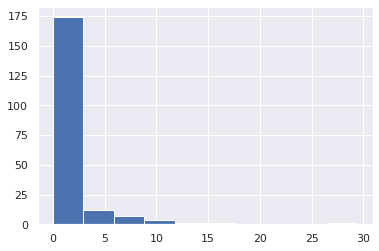

In [32]:
df_covid_filtered['new_deaths_per_million'].hist()

# References

* [Getting Started with BigQuery](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=OHCBQv4uTCPc)
* [Intro to pandas in Colab](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb#scrollTo=rHLcriKWLRe4)
* Hannah Ritchie, Edouard Mathieu, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Esteban Ortiz-Ospina, Joe Hasell, Bobbie Macdonald, Diana Beltekian and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: <https://ourworldindata.org/coronavirus> 
[Online Resource]